# Gaussian XOR and Gaussian R-XOR Random Forest Bootstrap Experiment

## Overview

In this experiment, we are interested in learning at which angles RXOR is significantly different from XOR to warrant training a new Random Forest. We will do this for each angle in the angle sweep by:
1. Generating 100 XOR and 100 RXOR samples and training their respective trees on randomly selected 70 samples from each.
2. Concatenating the remaing 30 samples from both distributions (60 samples total) and pushing them through both XOR and RXOR random forests to get an array of probabilities for each sample. 
3. Calculate L2 distance between the 2 arrays of probabilities. We will call this d1.
4. Concatenate ALL XOR and RXOR samples (200 total) and randomly select 70 samples to be XOR_new and 70 samples to be RXOR_new (bootstrap).
5. Train 2 new trees with XOR_new and RXOR_new.
6. Use the remaining 60 samples to calculate probabilities from both new trees.
7. Calculate L2 distance between the new probabilities (d2).
8. Repeat steps 4-7 1000 times and calculate p-value by 1 - ((# of times d1 > d2)/1000).
9. This entire experiment is then repeated 100 times to account for randomness.

Finally, we take the mean of the p-values across each 100 tests for each angle and plot.

## Running the Experiment

We will start by importing dependencies and running the experiment outlined above. This will take quite a while.

In [ ]:
# import
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xor_rxor_bootstrap_fns as fn

In [ ]:
# set angle sweep
angle_sweep = range(0, 90, 5)
# data frame to store p values from each run
p_val_df = pd.DataFrame()

# time experiment
start = time.time()

# run the experiment for 100 repetitions, bootstrap each experiment for 1000 reps
for i in range(100):
    p_val_df[i] = fn.bootstrap(angle_sweep=angle_sweep, n_samples=100, reps=1000)
end = time.time()

# entire experiment run time
print("\nThe function took {:.2f} s to compute.".format(end - start))
# The function took 26973.70 s to compute.

## Visualizing the Results

Next, we compute the mean across each test for each angle. We will use this to the mean p-value for each angle with errors bars for the 25th and 75th percentiles. 

In [4]:
# compute mean across each test for each angle
p_val_df["mean"] = p_val_df.mean(axis=1)

Text(0.5, 1.0, 'Angle of Rotation vs mean P-Value')

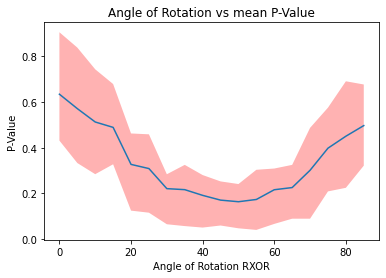

In [5]:
# plot with error bars
qunatiles = np.nanquantile(p_val_df.iloc[:, :-1], [0.25, 0.75], axis=1)
plt.fill_between(angle_sweep, qunatiles[0], qunatiles[1], facecolor="r", alpha=0.3)
plt.plot(angle_sweep, p_val_df["mean"])
plt.xlabel("Angle of Rotation RXOR")
plt.ylabel("P-Value")
plt.title("Angle of Rotation vs mean P-Value")

## Saving our Results

Finally, we can write this dataframe to csv to avoid rerunning the experiment.

In [6]:
# optional write to csv
p_val_df.to_csv("p_val_df_with_mean.csv")